## Observations from Analysis

OBSERVED TREND 1: The process selected 583 unique cities. On 2/17/2020, the highest temperature was recorded in Salaga , Ghana at 106.07˚F. The lowest temperature recorded was -34.6˚F in Barrow, USA and High Level, Canada. Generally, the highest global temperatures were within the tropics.(The band of latitudes ranging from 23.5˚ south (Tropic of Capricorn) to 23.5˚ north (Tropic of Cancer.)) The two highest temperature points were measured south of the Tropic of Capricorn, which is consistent with the season, as we are approaching the summer solstice in the Southern Hemisphere. Temperatures dropped sharply north of the Tropic of Cancer; all of the below freezing (32˚F) temperatures were in this region. This is consistent with the season, as we are in the winter solstice in the Northern Hemisphere. As latitude moves away from equator, temperature also decreases

OBSERVED TREND 2: On 2/17/2020, the highest wind speed recorded was 32.21 mph in Naze, Japan, north of the Tropic of Cancer. The next 10 highest wind speed measurements were also recorded north of the Tropic of Cancer. Generally, wind speeds appear to be higher north and south of the tropics, and lower within the tropics. There also appears to be some correlation between coastal locations and wind speeds; wind speed appears to be higher in coastal locations, and lower inland.

OBSERVED TREND 3: On 2/17/2020, humidity was consistently higher in the tropics, and lower north of the Tropic of Cancer, and south of the Tropic of Capricorn. There appears to be some correlation between coastal locations and humidity; humidity appears to be higher in coastal locations, and lower inland. Cloudiness appears to be distibuted fairly evely around the globe. There was 119 locations with 100% cloudiness and there were 87 locations with 0% cloudiness.

# WeatherPy
-------------------

In [94]:
# Dependencies and Setup
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from datetime import datetime
from random import uniform
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
import math
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
cloudiness, new_cities, country, date, humidity, lat, lng, max_temp, wind_speed = \
    [], [], [], [], [], [], [], [], []
print("Beginning Data Retrieval")
print("----------------------------------------------")
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
count = 1
record = 1

for city in cities:
    # Build query URL
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url).json()
    try:
        if record <= 50:
            print(f"Processing Record {record} of Set {count} | {city}")
            record += 1
        else:
            record = 1
            count += 1 
        cloudiness.append(weather_response["clouds"]["all"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        humidity.append(weather_response['main']['humidity'])
        lng.append(weather_response['coord']['lon'])
        lat.append(weather_response['coord']['lat'])
        wind_speed.append(weather_response["wind"]["speed"])
        max_temp.append(weather_response['main']['temp_max'])
        new_cities.append(city)
    except:
        print(f"City not found. Skipping...")
        pass
    

Beginning Data Retrieval
----------------------------------------------
Processing Record 1 of Set 1 | tyrma
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | lavrentiya
Processing Record 4 of Set 1 | marcona
City not found. Skipping...
Processing Record 5 of Set 1 | krasnozavodsk
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | asfi
Processing Record 8 of Set 1 | padang
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | amderma
City not found. Skipping...
Processing Record 15 of Set 1 | saint-joseph
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 18 of Set 1 | inderborskiy
City not found. Skipping...
Processing Record 19 of Set 1 | independence


Processing Record 32 of Set 4 | ginda
Processing Record 33 of Set 4 | luanda
Processing Record 34 of Set 4 | vaini
Processing Record 35 of Set 4 | naze
Processing Record 36 of Set 4 | dingle
Processing Record 37 of Set 4 | taburi
City not found. Skipping...
Processing Record 38 of Set 4 | santa rosa
Processing Record 39 of Set 4 | taguatinga
Processing Record 40 of Set 4 | mancio lima
Processing Record 41 of Set 4 | samarai
Processing Record 42 of Set 4 | brownfield
Processing Record 43 of Set 4 | pacific grove
Processing Record 44 of Set 4 | tuktoyaktuk
Processing Record 45 of Set 4 | thompson
Processing Record 46 of Set 4 | mahadday weyne
City not found. Skipping...
Processing Record 47 of Set 4 | xingyi
Processing Record 48 of Set 4 | caravelas
Processing Record 49 of Set 4 | khandbari
Processing Record 50 of Set 4 | pochutla
Processing Record 1 of Set 5 | miraflores
Processing Record 2 of Set 5 | lolua
City not found. Skipping...
Processing Record 3 of Set 5 | sur
Processing Record

Processing Record 24 of Set 8 | mekhe
Processing Record 25 of Set 8 | kuressaare
Processing Record 26 of Set 8 | miyakonojo
Processing Record 27 of Set 8 | broken hill
Processing Record 28 of Set 8 | pandan
Processing Record 29 of Set 8 | andra
Processing Record 30 of Set 8 | jinchengjiang
City not found. Skipping...
Processing Record 31 of Set 8 | udachnyy
Processing Record 32 of Set 8 | nanortalik
Processing Record 33 of Set 8 | beringovskiy
Processing Record 34 of Set 8 | puerto maldonado
Processing Record 35 of Set 8 | yabassi
Processing Record 36 of Set 8 | almoloya
Processing Record 37 of Set 8 | gambela
Processing Record 38 of Set 8 | lakatoro
Processing Record 39 of Set 8 | nuuk
Processing Record 40 of Set 8 | saldanha
Processing Record 41 of Set 8 | devrek
Processing Record 42 of Set 8 | catamarca
Processing Record 43 of Set 8 | kavaratti
Processing Record 44 of Set 8 | jos
Processing Record 45 of Set 8 | erzin
Processing Record 46 of Set 8 | abha
Processing Record 47 of Set 8

Processing Record 13 of Set 12 | takoradi
Processing Record 14 of Set 12 | kutum
Processing Record 15 of Set 12 | praia da vitoria
Processing Record 16 of Set 12 | paradwip
City not found. Skipping...
Processing Record 17 of Set 12 | copiapo
Processing Record 18 of Set 12 | aripuana
Processing Record 19 of Set 12 | anahuac
Processing Record 20 of Set 12 | marsa matruh
Processing Record 21 of Set 12 | grand centre
City not found. Skipping...
Processing Record 22 of Set 12 | manaure
Processing Record 23 of Set 12 | huarmey
Processing Record 24 of Set 12 | leh
Processing Record 25 of Set 12 | alamos
Processing Record 26 of Set 12 | manzanillo
Processing Record 27 of Set 12 | hunza
City not found. Skipping...
Processing Record 28 of Set 12 | poddorye
Processing Record 29 of Set 12 | colares
Processing Record 30 of Set 12 | san quintin
Processing Record 31 of Set 12 | ossora
Processing Record 32 of Set 12 | jiazi
Processing Record 33 of Set 12 | gobabis
Processing Record 34 of Set 12 | port

In [17]:
# Display the length of the querries
print(f"Cloudiness:  {len(cloudiness)}")
print(f"New_cities:  {len(new_cities)}")
print(f"Country:     {len(country)}")
print(f"Date:        {len(date)}")
print(f"Humidity:    {len(humidity)}")
print(f"Lat:         {len(lat)}")
print(f"Lng:         {len(lng)}")
print(f"Max_temp:    {len(max_temp)}")
print(f"Wind_speed:  {len(wind_speed)}")


Cloudiness:  583
New_cities:  583
Country:     583
Date:        583
Humidity:    583
Lat:         583
Lng:         583
Max_temp:    583
Wind_speed:  583


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [60]:
weather_dict = {
    "City": new_cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

cities_df = pd.DataFrame(weather_dict)
cities_df.to_csv("Output/cities_df.csv", encoding="utf-8", index=False)
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tyrma,15,RU,1581949960,99,50.08,132.17,-3.82,1.68
1,bluff,100,NZ,1581949961,96,-46.60,168.33,55.99,1.01
2,lavrentiya,100,RU,1581949961,86,65.58,-171.00,-4.50,12.33
3,krasnozavodsk,100,RU,1581949962,88,56.45,38.22,36.99,18.28
4,jamestown,90,US,1581949962,100,42.10,-79.24,30.20,4.70


### Plotting the Data  and saving the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [19]:
sns.set()

In [20]:
cur_date = datetime.now() 

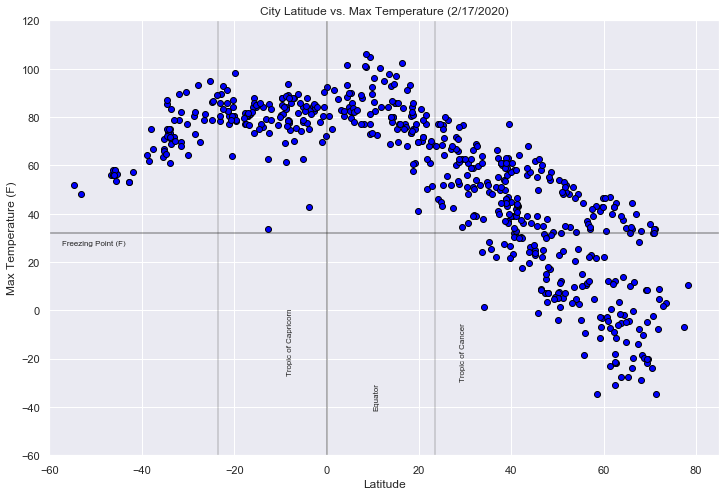

In [95]:
plt.figure(figsize = (12, 8)) 
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", facecolors='blue', edgecolor="black")
plt.xlim(-60, 85)
plt.ylim(-60, 120)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.axvline(0, c='k', alpha=.4)
plt.axvline(23.5, c='k', alpha=.2)
plt.axvline(-23.5, c='k', alpha=.2)
plt.axhline(32, c='k', alpha=.4)
plt.title('City Latitude vs. Max Temperature (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.gcf().text(.50, .205, 'Equator', fontsize=8, rotation='vertical')
plt.gcf().text(.40, .265, 'Tropic of Capricorn', fontsize=8, rotation='vertical')
plt.gcf().text(.60, .255, 'Tropic of Cancer', fontsize=8, rotation='vertical')
plt.gcf().text(.14, .49, 'Freezing Point (F)', fontsize=8, rotation='horizontal')
plt.grid(True)
plt.savefig("Images/TemperaturePlot.png")
plt.show()

#### Latitude vs. Humidity Plot

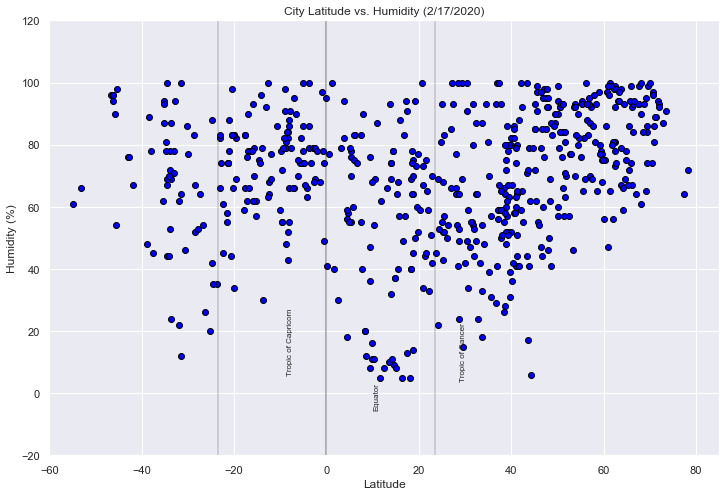

In [96]:
plt.figure(figsize = (12, 8))
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", facecolors='blue', edgecolor="black")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-60, 85)
plt.ylim(-20, 120)
plt.axvline(0, c='k', alpha=.4)
plt.axvline(23.5, c='k', alpha=.2)
plt.axvline(-23.5, c='k', alpha=.2)
plt.title('City Latitude vs. Humidity (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.gcf().text(.50, .205, 'Equator', fontsize=8, rotation='vertical')
plt.gcf().text(.40, .265, 'Tropic of Capricorn', fontsize=8, rotation='vertical')
plt.gcf().text(.60, .255, 'Tropic of Cancer', fontsize=8, rotation='vertical')
plt.grid(True)
plt.savefig("Images/HumidityPlot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

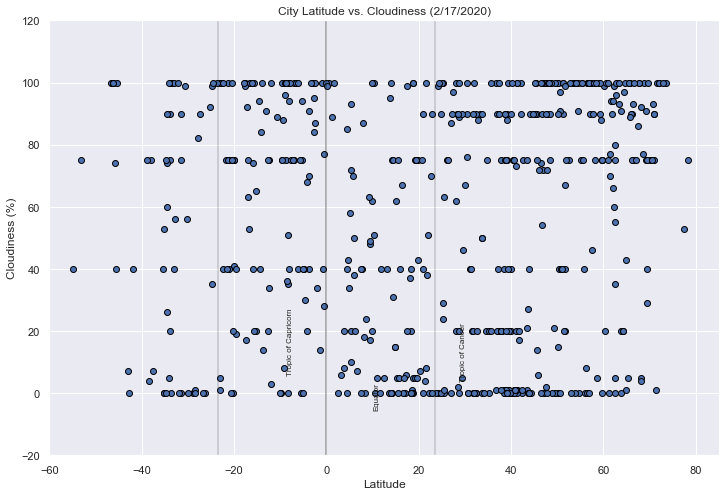

In [97]:
plt.figure(figsize = (12, 8)) 
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", edgecolor="black")
plt.xlim(-60, 85)
plt.ylim(-20, 120)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.axvline(0, c='k', alpha=.4)
plt.axvline(23.5, c='k', alpha=.2)
plt.axvline(-23.5, c='k', alpha=.2)
plt.title('City Latitude vs. Cloudiness (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.gcf().text(.50, .205, 'Equator', fontsize=8, rotation='vertical')
plt.gcf().text(.40, .265, 'Tropic of Capricorn', fontsize=8, rotation='vertical')
plt.gcf().text(.60, .255, 'Tropic of Cancer', fontsize=8, rotation='vertical')
plt.grid(True)
plt.savefig("Images/CloudinessPlot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

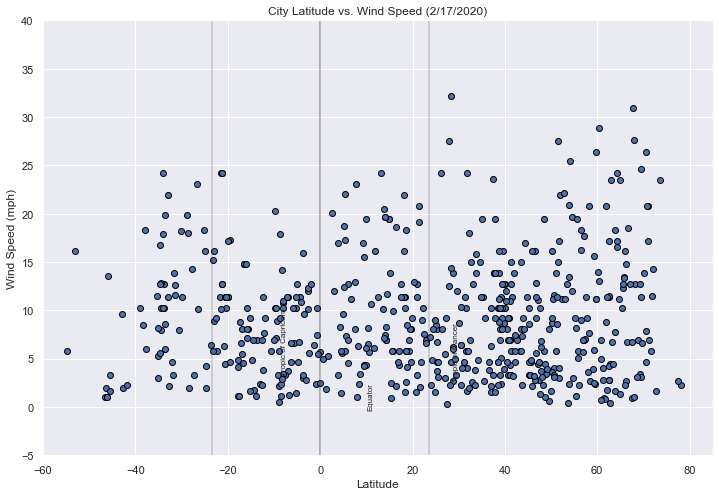

In [98]:
plt.figure(figsize = (12, 8))
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", edgecolor="black")
plt.xlim(-60, 85)
plt.ylim(-5, 40)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.axvline(0, c='k', alpha=.4)
plt.axvline(23.5, c='k', alpha=.2)
plt.axvline(-23.5, c='k', alpha=.2)
plt.title('City Latitude vs. Wind Speed (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.gcf().text(.50, .205, 'Equator', fontsize=8, rotation='vertical')
plt.gcf().text(.40, .265, 'Tropic of Capricorn', fontsize=8, rotation='vertical')
plt.gcf().text(.60, .255, 'Tropic of Cancer', fontsize=8, rotation='vertical')
plt.grid(True)
plt.savefig("Images/WindSpeedPlot.png")
plt.show()

## Linear Regression

In [99]:
# Create a function to create Linear Regression plots
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"Images/{ifig}.png")
    plt.show()

In [100]:
# Create Northern and Southern Hemisphere DataFrames
northern = weather_data.loc[weather_data["Lat"] >= 0.0]
#northern.reset_index(inplace=True)

southern = weather_data.loc[weather_data["Lat"] < 0.0]
#southern.reset_index(inplace=True)
northern.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tyrma,15,RU,1581949960,99,50.08,132.17,-3.82,1.68
2,lavrentiya,100,RU,1581949961,86,65.58,-171.00,-4.50,12.33
3,krasnozavodsk,100,RU,1581949962,88,56.45,38.22,36.99,18.28
4,jamestown,90,US,1581949962,100,42.10,-79.24,30.20,4.70
5,asfi,0,MA,1581949962,64,32.30,-9.24,68.90,18.03


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8468151907463228


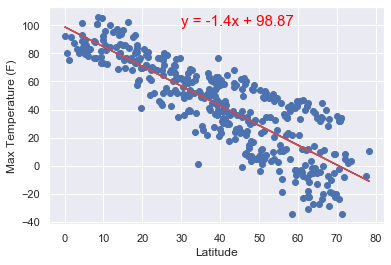

In [101]:
xdata = northern["Lat"]
ydata = northern["Max Temp"]
xlbl = "Latitude"
ylbl = "Max Temperature (F)"
lblpos = (30,100)
ifig = "Northern Hemisphere Max Temp (F) vs. Latitude Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.48958872305910034


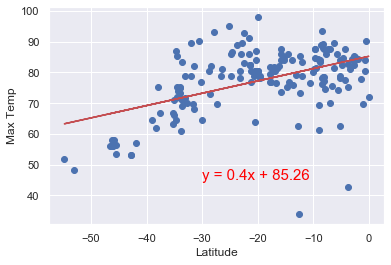

In [102]:
xdata = southern["Lat"]
ydata = southern["Max Temp"]
xlbl = "Latitude"
ylbl = "Max Temp"
lblpos = (-30,45)
ifig = "Southern Hemisphere Max Temp vs. Latitude Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.46231017739046104


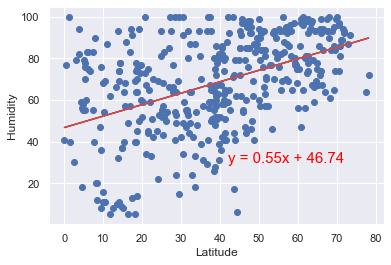

In [103]:
xdata = northern["Lat"]
ydata = northern["Humidity"]
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (42,30)
ifig = "Northern Hemisphere Humidity vs. Latitude Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10382149134413839


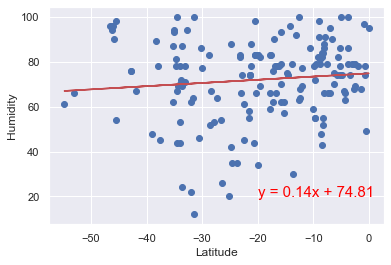

In [104]:
xdata = southern["Lat"]
ydata = southern["Humidity"]
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (-20,20)
ifig = "Southern Hemisphere Humidity vs. Latitude Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.299818701048868


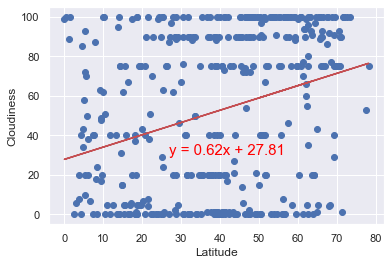

In [105]:
xdata = northern["Lat"]
ydata = northern["Cloudiness"]
xlbl = "Latitude"
ylbl = "Cloudiness"
lblpos = (27,30)
ifig = "Northern Hemisphere Cloudiness vs. Latitude Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12082821897256903


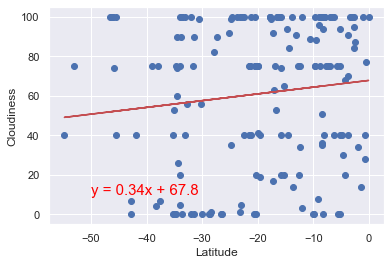

In [106]:
xdata = southern["Lat"]
ydata = southern["Cloudiness"]
xlbl = "Latitude"
ylbl = "Cloudiness"
lblpos = (-50,10)
ifig = "Southern Hemisphere Cloudiness vs. Latitude Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.052014325026905346


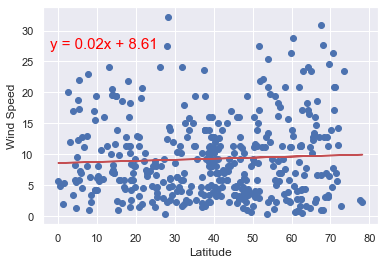

In [107]:
xdata = northern["Lat"]
ydata = northern["Wind Speed"]
xlbl = "Latitude"
ylbl = "Wind Speed"
lblpos = (-2,27)
ifig = "Northern Hemisphere Wind Speed vs. Latitude Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.12928120589715325


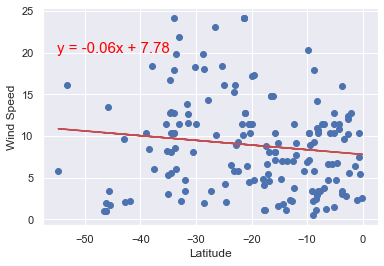

In [108]:
xdata = southern["Lat"]
ydata = southern["Wind Speed"]
xlbl = "Latitude"
ylbl = "Wind Speed"
lblpos = (-55,20)
ifig = "Southern Hemisphere Wind Speed vs. Latitude Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

### Global Temperatures by Longitude and Latitiude

In [109]:
cities_df['temp_v'] = "xkcd:dark purple"                                     # adds column to df, sets <= 0 colors
cities_df.loc[cities_df['Max Temp'] > 0, 'temp_v'] = "xkcd:violet"           # assigns colors to temps by range
cities_df.loc[cities_df['Max Temp'] > 10, 'temp_v'] = "xkcd:indigo blue"
cities_df.loc[cities_df['Max Temp'] > 20, 'temp_v'] = "xkcd:blue"
cities_df.loc[cities_df['Max Temp'] > 30, 'temp_v'] = "xkcd:green"
cities_df.loc[cities_df['Max Temp'] > 40, 'temp_v'] = "xkcd:sea green"
cities_df.loc[cities_df['Max Temp'] > 50, 'temp_v'] = "xkcd:yellow green"
cities_df.loc[cities_df['Max Temp'] > 60, 'temp_v'] = "xkcd:yellow"
cities_df.loc[cities_df['Max Temp'] > 70, 'temp_v'] = "xkcd:orange"
cities_df.loc[cities_df['Max Temp'] > 80, 'temp_v'] = "xkcd:reddish orange"
cities_df.loc[cities_df['Max Temp'] > 90, 'temp_v'] = "xkcd:red"

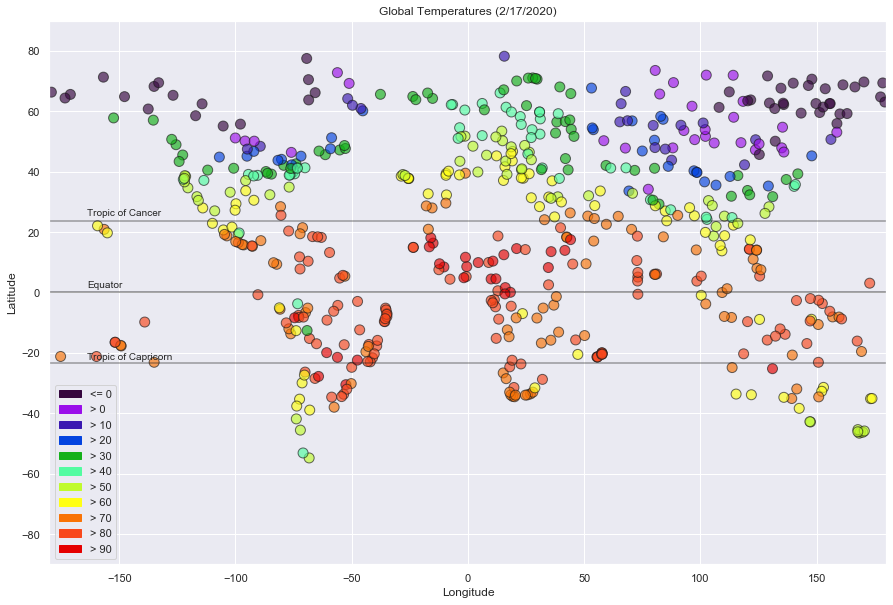

In [110]:
fig = plt.figure(figsize=(15,10))                                            # sets plot parameters
ax = fig.add_subplot(1,1,1)
ax.scatter(cities_df['Lng'], cities_df['Lat'], color=cities_df["temp_v"], s=100,  alpha=.65, edgecolors="k")
handles, labels = ax.get_legend_handles_labels()
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.title('Global Temperatures (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gcf().text(.16,.51,"Equator", fontsize=10)
plt.gcf().text(.16,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.41,"Tropic of Capricorn", fontsize=10)

templt0 = mpatches.Patch(color='xkcd:dark purple', label='<= 0')
tempgt0 = mpatches.Patch(color='xkcd:violet', label='> 0')
tempgt10 = mpatches.Patch(color='xkcd:indigo blue', label='> 10')
tempgt20 = mpatches.Patch(color='xkcd:blue', label='> 20')
tempgt30 = mpatches.Patch(color='xkcd:green', label='> 30')
tempgt40 = mpatches.Patch(color='xkcd:sea green', label='> 40')
tempgt50 = mpatches.Patch(color='xkcd:yellow green', label='> 50')
tempgt60 = mpatches.Patch(color='xkcd:yellow', label='> 60')
tempgt70 = mpatches.Patch(color='xkcd:orange', label='> 70')
tempgt80 = mpatches.Patch(color='xkcd:reddish orange', label='> 80')
tempgt90 = mpatches.Patch(color='xkcd:red', label='> 90')

plt.legend(handles=[templt0,
                    tempgt0,
                    tempgt10,
                    tempgt20,
                    tempgt30,
                    tempgt40,
                    tempgt50,
                    tempgt60,
                    tempgt70,
                    tempgt80,
                    tempgt90], frameon=True, loc="lower left")
plt.savefig("Images/GlobalTempPlot.png")
plt.show()

### Global Humidity by Longitude and Latitiude

In [111]:
cities_df['humdy_v'] = ""                                                    # adds column to dataframe
cities_df.loc[cities_df['Humidity'] >=0, 'humdy_v'] = "#FFFFFF"              # assigns colors to humidity by range
cities_df.loc[cities_df['Humidity'] > 10, 'humdy_v'] = "#E5E5FF"
cities_df.loc[cities_df['Humidity'] > 20, 'humdy_v'] = "#CCCCFF"
cities_df.loc[cities_df['Humidity'] > 30, 'humdy_v'] = "#B2B2FF"
cities_df.loc[cities_df['Humidity'] > 40, 'humdy_v'] = "#9999FF"
cities_df.loc[cities_df['Humidity'] > 50, 'humdy_v'] = "#7F7FFF"
cities_df.loc[cities_df['Humidity'] > 60, 'humdy_v'] = "#6666FF"
cities_df.loc[cities_df['Humidity'] > 70, 'humdy_v'] = "#4C4CFF"
cities_df.loc[cities_df['Humidity'] > 80, 'humdy_v'] = "#3333FF"
cities_df.loc[cities_df['Humidity'] > 90, 'humdy_v'] = "#1919FF"
cities_df.loc[cities_df['Humidity'] >= 100, 'humdy_v'] = "#0000FF"

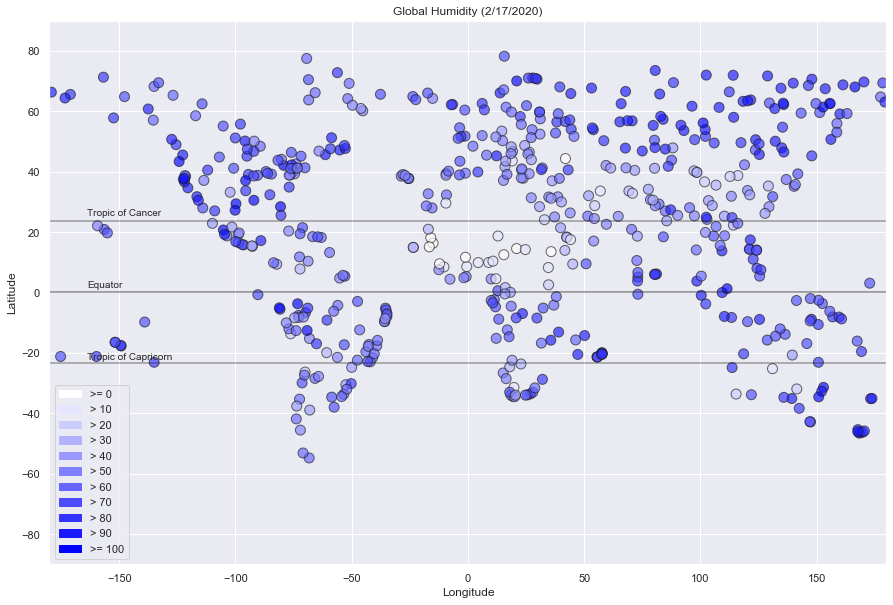

In [112]:
fig = plt.figure(figsize=(15,10))                                            # sets plot parameters
ax = fig.add_subplot(1,1,1)
ax.scatter(cities_df["Lng"], cities_df["Lat"], color=cities_df["humdy_v"], s=100, alpha=.65, edgecolors="k")
handles, labels = ax.get_legend_handles_labels()
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.title('Global Humidity (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gcf().text(.16,.51,"Equator", fontsize=10)
plt.gcf().text(.16,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.41,"Tropic of Capricorn", fontsize=10)

humidityge0 = mpatches.Patch(color='#FFFFFF', label='>= 0')
humiditygt10 = mpatches.Patch(color='#E5E5FF', label='> 10')
humiditygt20 = mpatches.Patch(color='#CCCCFF', label='> 20')
humiditygt30 = mpatches.Patch(color='#B2B2FF', label='> 30')
humiditygt40 = mpatches.Patch(color='#9999FF', label='> 40')
humiditygt50 = mpatches.Patch(color='#7F7FFF', label='> 50')
humiditygt60 = mpatches.Patch(color='#6666FF', label='> 60')
humiditygt70 = mpatches.Patch(color='#4C4CFF', label='> 70')
humiditygt80 = mpatches.Patch(color='#3333FF', label='> 80')
humiditygt90 = mpatches.Patch(color='#1919FF', label='> 90')
humidityge100 = mpatches.Patch(color='#0000FF', label='>= 100')

plt.legend(handles=[humidityge0,
                    humiditygt10,
                    humiditygt20,
                    humiditygt30,
                    humiditygt40,
                    humiditygt50,
                    humiditygt60,
                    humiditygt70,
                    humiditygt80,
                    humiditygt90,
                    humidityge100], frameon=True, loc="lower left")

plt.savefig("Images/GlobalHumidityPlot.png")
plt.show()                                                                   # displays plot

### Global Cloudiness by Longitude and Latitiude

In [113]:
cities_df['cloud_v'] = ""                                                    # adds column to dataframe
cities_df.loc[cities_df['Cloudiness'] >= 0, 'cloud_v'] = "#0000FF"           # assigns colors to cloudiness by range
cities_df.loc[cities_df['Cloudiness'] > 10, 'cloud_v'] = "#1919FF"
cities_df.loc[cities_df['Cloudiness'] > 20, 'cloud_v'] = "#3333FF"
cities_df.loc[cities_df['Cloudiness'] > 30, 'cloud_v'] = "#4C4CFF"
cities_df.loc[cities_df['Cloudiness'] > 40, 'cloud_v'] = "#6666FF"
cities_df.loc[cities_df['Cloudiness'] > 50, 'cloud_v'] = "#7F7FFF"
cities_df.loc[cities_df['Cloudiness'] > 60, 'cloud_v'] = "#9999FF"
cities_df.loc[cities_df['Cloudiness'] > 70, 'cloud_v'] = "#B2B2FF"
cities_df.loc[cities_df['Cloudiness'] > 80, 'cloud_v'] = "#CCCCFF"
cities_df.loc[cities_df['Cloudiness'] > 90, 'cloud_v'] = "#E5E5FF"
cities_df.loc[cities_df['Cloudiness'] > 100, 'cloud_v'] = "#FFFFFF"

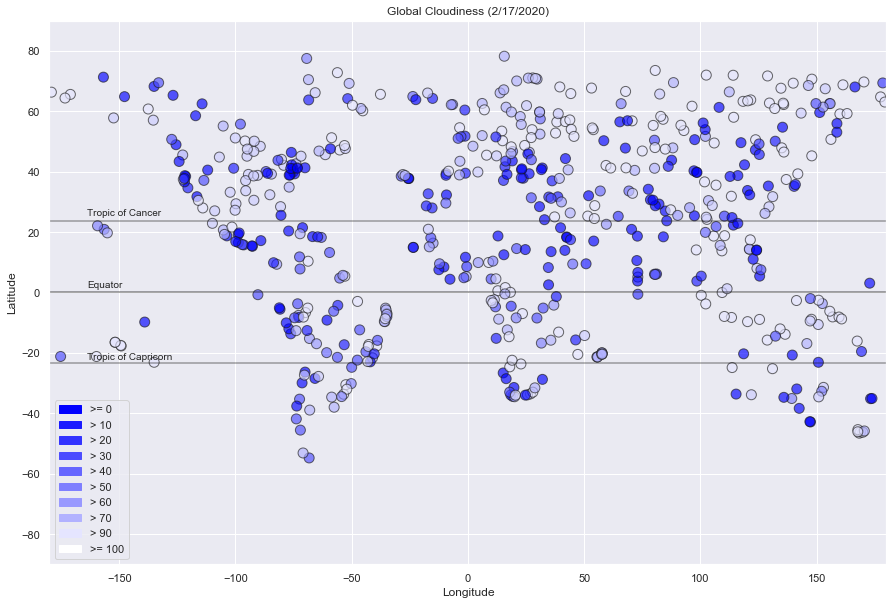

In [114]:
fig = plt.figure(figsize=(15,10))                                            # sets plot parameters
ax = fig.add_subplot(1,1,1)
ax.scatter(cities_df["Lng"], cities_df["Lat"], color=cities_df["cloud_v"], s=100, alpha=.65, edgecolors="k")
handles, labels = ax.get_legend_handles_labels()
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.title('Global Cloudiness (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gcf().text(.16,.51,"Equator", fontsize=10)
plt.gcf().text(.16,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.41,"Tropic of Capricorn", fontsize=10)

cloudsge0 = mpatches.Patch(color='#0000FF', label='>= 0')
cloudsgt10 = mpatches.Patch(color='#1919FF', label='> 10')
cloudsgt20 = mpatches.Patch(color='#3333FF', label='> 20')
cloudsgt30 = mpatches.Patch(color='#4C4CFF', label='> 30')
cloudsgt40 = mpatches.Patch(color='#6666FF', label='> 40')
cloudsgt50 = mpatches.Patch(color='#7F7FFF', label='> 50')
cloudsgt60 = mpatches.Patch(color='#9999FF', label='> 60')
cloudsgt70 = mpatches.Patch(color='#B2B2FF', label='> 70')
cloudsgt80 = mpatches.Patch(color='#CCCCFF', label='> 80')
cloudsgt90 = mpatches.Patch(color='#E5E5FF', label='> 90')
cloudsge100 = mpatches.Patch(color='#FFFFFF', label='>= 100')

plt.legend(handles=[cloudsge0,
                    cloudsgt10,
                    cloudsgt20,
                    cloudsgt30,
                    cloudsgt40,
                    cloudsgt50,
                    cloudsgt60,
                    cloudsgt70,
                    cloudsgt90,
                    cloudsge100], frameon=True, loc="lower left")
plt.savefig("Images/GlobalCloudinessPlot.png")
plt.show()                                                                   # displays plot



### Global Wind Speed by Longitude and Latitiude

In [115]:
cities_df['wind_v'] = ""                                                     # adds column to dataframe
cities_df.loc[cities_df['Wind Speed'] >= 0, 'wind_v'] = "xkcd:violet"        # assigns colors to wind speed by range
cities_df.loc[cities_df['Wind Speed'] > 5, 'wind_v'] = "xkcd:indigo blue"
cities_df.loc[cities_df['Wind Speed'] > 10, 'wind_v'] = "xkcd:blue"
cities_df.loc[cities_df['Wind Speed'] > 15, 'wind_v'] = "xkcd:green"
cities_df.loc[cities_df['Wind Speed'] > 20, 'wind_v'] = "xkcd:sea green"
cities_df.loc[cities_df['Wind Speed'] > 35, 'wind_v'] = "xkcd:yellow"
cities_df.loc[cities_df['Wind Speed'] > 30, 'wind_v'] = "xkcd:orange"
cities_df.loc[cities_df['Wind Speed'] > 35, 'wind_v'] = "xkcd:reddish orange"
cities_df.loc[cities_df['Wind Speed'] > 40, 'wind_v'] = "xkcd:red"

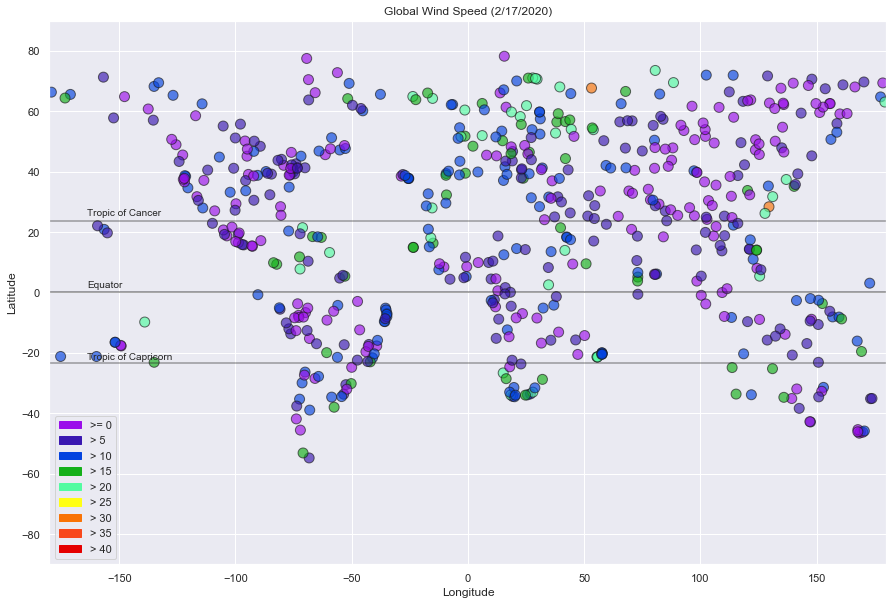

In [116]:
fig = plt.figure(figsize=(15,10))                                            # sets plot parameters
ax = fig.add_subplot(1,1,1)
ax.scatter(cities_df["Lng"], cities_df["Lat"], color=cities_df["wind_v"], s=100, alpha=.65, edgecolors="k")
handles, labels = ax.get_legend_handles_labels()
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.title('Global Wind Speed (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gcf().text(.16,.51,"Equator", fontsize=10)
plt.gcf().text(.16,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.41,"Tropic of Capricorn", fontsize=10)

windge0 = mpatches.Patch(color='xkcd:violet', label='>= 0')
windgt5 = mpatches.Patch(color='xkcd:indigo blue', label='> 5')
windgt10 = mpatches.Patch(color='xkcd:blue', label='> 10')
windgt15 = mpatches.Patch(color='xkcd:green', label='> 15')
windgt20 = mpatches.Patch(color='xkcd:sea green', label='> 20')
windgt25 = mpatches.Patch(color='xkcd:yellow', label='> 25')
windgt30 = mpatches.Patch(color='xkcd:orange', label='> 30')
windgt35 = mpatches.Patch(color='xkcd:reddish orange', label='> 35')
windgt40 = mpatches.Patch(color='xkcd:red', label='> 40')

plt.legend(handles=[windge0, windgt5, 
                    windgt10, 
                    windgt15, 
                    windgt20, 
                    windgt25, 
                    windgt30, 
                    windgt35, 
                    windgt40], frameon=True, loc="lower left")
plt.savefig("Images/GlobalWindPlot.png")
plt.show()                                                                   # displays plot